# Regression Lineaire Multiple

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
def model(X,theta):
    return X.dot(theta)

In [3]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [4]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [5]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(0, iterations):
        theta = theta - learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
        

    return theta, cost_history

In [6]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y -y.mean())**2).sum()
    return 1 - u/v

In [7]:
data = pd.read_csv("Data_Regression/boston_house_prices.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
x = np.array(data.iloc[:,-14:-1])
print(x.shape)
y = np.array(data.iloc[:,-1]).reshape(x.shape[0],1)
print(y.shape)

(506, 13)
(506, 1)


In [9]:
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)
print(X[:3])

(506, 14)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00 1.0000e+00]]


In [10]:
theta = np.random.randn(14,1)
print("theta shape : ",theta.shape)
print("theta : ",theta)

theta shape :  (14, 1)
theta :  [[ 0.03048513]
 [-0.92904332]
 [-0.68084755]
 [ 0.4895637 ]
 [-0.3458445 ]
 [ 0.6006114 ]
 [ 0.33231439]
 [ 1.08363194]
 [ 0.62048242]
 [ 0.35416913]
 [ 0.55527495]
 [ 1.77611561]
 [ 1.35239454]
 [-0.51591035]]


In [11]:
iterations = 700000
learning_rate = 0.0000063

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print(theta_final)

[[-9.43642253e-02]
 [ 5.29177792e-02]
 [-5.74457899e-03]
 [ 1.19097449e+00]
 [-1.49461959e-01]
 [ 5.56347576e+00]
 [-2.22162727e-03]
 [-9.07355867e-01]
 [ 1.80794413e-01]
 [-1.04399654e-02]
 [-3.48939917e-01]
 [ 1.55543461e-02]
 [-4.55343119e-01]
 [ 8.56873143e-02]]


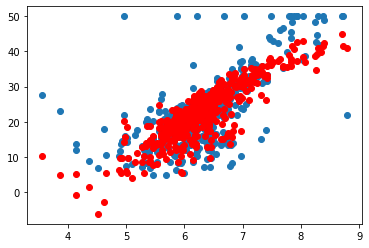

In [12]:
prediction = model(X, theta_final)

plt.scatter(X[:,5],y)
plt.scatter(X[:,5],prediction, c='r')

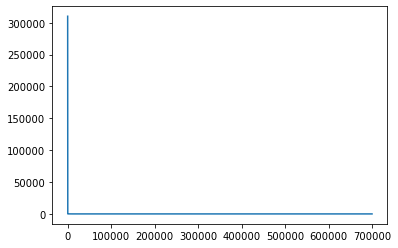

In [13]:
plt.plot(range(iterations), cost_history)

In [14]:
coef_determination(y, prediction)

0.710909752134058

In [15]:
mse = mean_squared_error(y, prediction)
print(mse)

24.404870413918704


In [16]:
data_vin = pd.read_csv("Data_Regression/qualite_vin_rouge.csv")
data_vin

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
x_vin = np.array(data_vin.iloc[:,-12:-1])
print(x_vin)
y_vin = np.array(data_vin.iloc[:,-1]).reshape(x_vin.shape[0],1)
print(y_vin)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[[5]
 [5]
 [5]
 ...
 [6]
 [5]
 [6]]


In [18]:
X_vin = np.hstack((x_vin, np.ones((x_vin.shape[0],1))))
print(X_vin)

[[ 7.4    0.7    0.    ...  0.56   9.4    1.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    1.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    1.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     1.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    1.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     1.   ]]


In [19]:
theta_vin = np.random.randn(12,1)
print(theta_vin)

[[-0.48296251]
 [ 0.04115109]
 [ 0.10613335]
 [-0.21171955]
 [-1.26551209]
 [ 0.29600107]
 [-1.23721489]
 [-0.94617872]
 [ 0.6607487 ]
 [ 0.39708728]
 [ 1.12986503]
 [-1.01175329]]


In [20]:
iterations_vin = 1000000
learning_rate_vin = 0.0005355

theta_final_vin, cost_history_vin = gradient_descent(X_vin, y_vin, theta_vin, learning_rate_vin, iterations_vin)
print(theta_final_vin)

[[ 0.06201546]
 [-1.11576337]
 [-0.22813651]
 [ 0.00678266]
 [-1.19741377]
 [ 0.00349507]
 [-0.00237361]
 [ 0.64719986]
 [ 0.25852826]
 [ 0.90059516]
 [ 0.30661344]
 [ 0.62150441]]


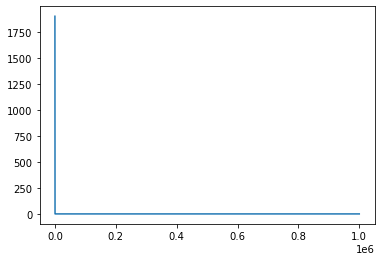

In [21]:
prediction_vin = model(X_vin, theta_final_vin)

plt.plot(range(iterations_vin), cost_history_vin)

In [22]:
coef_determination(y_vin, prediction_vin)

0.3492332267277315

In [23]:
mse = mean_squared_error(y_vin, prediction_vin)
print(mse)

0.42414410345189957
